<a href="https://colab.research.google.com/github/ricardogomesmatos/MilleniumComercial/blob/main/Projeto_Millenium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Leitura do campo comercial - Millenium - Setor Litoral**

Neste projeto, estaremos simplificando em números e em gráficos alguns pontos para uma melhor visitação planejada. Abordaremos temas que implicam no custo do trabalho.

Na rota do litoral, na Millenium Comercial, atendemos 10 cidades. Com diferentes distâncias, o setor de viagem necessita de uma otimiazação para que o PDA seja de fato bem aproveitado.

# Custo Médio Mensal

## Quilometragem para visitação - ROTA

In [ ]:
#Distância em km da cidade local - ida e volta
!pip install seaborn==0.9.0
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
%matplotlib inline

     |████████████████████████████████| 208 kB 4.1 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cidades = [['Guarapari', 40], ['Marataizes', 140], ['Anchieta', 60],['Alfredo Chaves', 104], ['Iconha', 102], ['Rio Novo do Sul', 140], ['Vargem Alta', 165], ['Itapemirim', 166
], ['Presidente Kenedy', 235], ['Piuma', 85]]

df = pd.DataFrame(cidades, columns=['Cidades', 'Km'])
df.set_index('Cidades', inplace=True)
print(df)

                    Km
Cidades               
Guarapari           40
Marataizes         140
Anchieta            60
Alfredo Chaves     104
Iconha             102
Rio Novo do Sul    140
Vargem Alta        165
Itapemirim         166
Presidente Kenedy  235
Piuma               85


## Variáveis

In [ ]:
gasolina = 7.20 #Litro referente à cotação atual - editável -
alimentacao = 35 #Alimentação referente à cotação atual - editável -
gasto_medio = 13 #Consumo médio do carro - km/h

## Rotas/Custo Médio

In [ ]:
dic = {'Guarapari': 40, 'Marataizes': 140, 'Anchieta': 60, 'Alfredo Chaves': 104, 'Iconha': 102, 'Rio Novo do Sul': 140, 'Vargem Alta': 165, 'Itapemirim': 166, 
      'Presidente Kenedy': 235, 'Piúma': 85}
dic_media_gasto = []
for i, u in dic.items():
  dic_media_gasto.append(dic)
  if i == 'Guarapari':
      print(f'Para trabalhar na rota de {i}, o RCA gastará em média \033[31mR$ {((u * gasolina) / gasto_medio):.2f}\033[37m/dia.')
  else:
      print(f'Para trabalhar na rota de {i}, o RCA gastará em média \033[31mR${(((u * gasolina) / gasto_medio) + alimentacao):.2f}\033[37m/dia.')

Para trabalhar na rota de Guarapari, o RCA gastará em média R$ 22.15/dia.
Para trabalhar na rota de Marataizes, o RCA gastará em média R$112.54/dia.
Para trabalhar na rota de Anchieta, o RCA gastará em média R$68.23/dia.
Para trabalhar na rota de Alfredo Chaves, o RCA gastará em média R$92.60/dia.
Para trabalhar na rota de Iconha, o RCA gastará em média R$91.49/dia.
Para trabalhar na rota de Rio Novo do Sul, o RCA gastará em média R$112.54/dia.
Para trabalhar na rota de Vargem Alta, o RCA gastará em média R$126.38/dia.
Para trabalhar na rota de Itapemirim, o RCA gastará em média R$126.94/dia.
Para trabalhar na rota de Presidente Kenedy, o RCA gastará em média R$165.15/dia.
Para trabalhar na rota de Piúma, o RCA gastará em média R$82.08/dia.


Considerando que para um melhor aproveitamento da rota, encontramos na logística um grande aliado na economia e junto, otimizar o tempo na visitação. A frequência [hz] de atendimento é quinzenal, sendo assim, há cidade, que, pelo fluxo de venda e distância lógica, não há necessidade de visita semanal.

# Base de clientes

In [ ]:
tabela_clientes = pd.read_excel('RCA BASE RICARDO.xlsx')
tabela_clientes

,CÓD,CNPJ,RAZÃO SOCIAL,ENDEREÇO,Nº,BAIRRO,CIDADE,Coluna1
0,17060,3613191000155,DROGARIA JOFARMA LTDA- ME/MEE,AV. GETULIO VARGAS,797,ALFREDO CHAVES,ALFREDO CHAVES,NaN
1,15555,5637428000163,DROGARIA BIOFARMA R & G LTDA,R THOMAZ COELHO,45,CENTRO,ALFREDO CHAVES,NaN
2,114480,20425834000156,FARMACIA DO TRABALHADOR DE ALFREDO CHAVES LTDA,AV GETULIO VARGAS,644,CENTRO,ALFREDO CHAVES,NaN
3,142873,42314938000126,PACHECOS FARMA LTDA,AV GETULIO VARGAS,686,CENTRO,ALFREDO CHAVES,NaN
4,124584,26620578000134,KAROLINE MARQUES COUTO - ME,R CARLOS RUBENS FLORES,166,ALVORADA,ANCHIETA,NaN
...,...,...,...,...,...,...,...,...
84,140107,39886979000182,DROGARIA MARCON LTDA,R CAPITAO BLEY,3,CENTRO,RIO NOVO DO SUL,NaN
85,138684,35856388000101,M & L DROGARIA E PERFUMARIA LTDA,R CEL. FRANCISCO ALVES ATHAYDE,109,CENTRO,RIO NOVO DO SUL,NaN
86,16543,39816830000127,DROGARIA E PERFUMARIA RIO NOVO LTDA,"RUA MAJOR CAETANO,",16,RIO NOVO DO SUL,RIO NOVO DO SUL,NaN
87,115908,20321160000140,VP PHARMASUL DROGARIA E PERFUMARIA LTDA - ME,R MAJOR CAETANO,58,RIO NOVO DO SUL,RIO NOVO DO SUL,NaN


In [ ]:
len(tabela_clientes)

89

In [ ]:
renomear = {'CÓD' : 'cod',
            'CNPJ' : 'CNPJ',
            'RAZÃO SOCIAL' : 'razao_social',
            'ENDEREÇO' : 'endereco',
            'Nº' : 'nº',
            'BAIRRO' : 'bairro',
            'CIDADE': 'cidade',
       'Coluna1' : 'coluna1'} 

tabela_clientes = tabela_clientes.rename(columns = renomear)

In [ ]:
tabela_clientes = tabela_clientes.drop(columns=['coluna1'])
tabela_clientes.set_index('cod', inplace=True)
tabela_clientes

,CNPJ,razao_social,endereco,nº,bairro,cidade
cod,,,,,,
17060,3613191000155,DROGARIA JOFARMA LTDA- ME/MEE,AV. GETULIO VARGAS,797,ALFREDO CHAVES,ALFREDO CHAVES
15555,5637428000163,DROGARIA BIOFARMA R & G LTDA,R THOMAZ COELHO,45,CENTRO,ALFREDO CHAVES
114480,20425834000156,FARMACIA DO TRABALHADOR DE ALFREDO CHAVES LTDA,AV GETULIO VARGAS,644,CENTRO,ALFREDO CHAVES
142873,42314938000126,PACHECOS FARMA LTDA,AV GETULIO VARGAS,686,CENTRO,ALFREDO CHAVES
124584,26620578000134,KAROLINE MARQUES COUTO - ME,R CARLOS RUBENS FLORES,166,ALVORADA,ANCHIETA
...,...,...,...,...,...,...
140107,39886979000182,DROGARIA MARCON LTDA,R CAPITAO BLEY,3,CENTRO,RIO NOVO DO SUL
138684,35856388000101,M & L DROGARIA E PERFUMARIA LTDA,R CEL. FRANCISCO ALVES ATHAYDE,109,CENTRO,RIO NOVO DO SUL
16543,39816830000127,DROGARIA E PERFUMARIA RIO NOVO LTDA,"RUA MAJOR CAETANO,",16,RIO NOVO DO SUL,RIO NOVO DO SUL


In [ ]:
tabela_clientes.columns


Index(['CNPJ', 'razao_social', 'endereco', 'nº', 'bairro', 'cidade'], dtype='object')

In [ ]:
tabela_clientes['cidade']

cod
17060      ALFREDO CHAVES
15555      ALFREDO CHAVES
114480     ALFREDO CHAVES
142873     ALFREDO CHAVES
124584           ANCHIETA
               ...       
140107    RIO NOVO DO SUL
138684    RIO NOVO DO SUL
16543     RIO NOVO DO SUL
115908    RIO NOVO DO SUL
210058        VARGEM ALTA
Name: cidade, Length: 89, dtype: object

In [ ]:
tabela_clientes['cidade'].value_counts()

GUARAPARI             32
ITAPEMIRIM            12
ANCHIETA              10
MARATAIZES             8
RIO NOVO DO SUL        7
ALFREDO CHAVES         4
ICONHA                 4
MARATAÍZES             4
PIUMA                  3
PIÚMA                  3
PRESIDENTE KENNEDY     1
VARGEM ALTA            1
Name: cidade, dtype: int64

In [ ]:
tabela_clientes.replace({'MARATAIZES' : 'MARATAÍZES', 'PIUMA': 'PIÚMA'}, inplace=True)
tabela_clientes

,CNPJ,razao_social,endereco,nº,bairro,cidade
cod,,,,,,
17060,3613191000155,DROGARIA JOFARMA LTDA- ME/MEE,AV. GETULIO VARGAS,797,ALFREDO CHAVES,ALFREDO CHAVES
15555,5637428000163,DROGARIA BIOFARMA R & G LTDA,R THOMAZ COELHO,45,CENTRO,ALFREDO CHAVES
114480,20425834000156,FARMACIA DO TRABALHADOR DE ALFREDO CHAVES LTDA,AV GETULIO VARGAS,644,CENTRO,ALFREDO CHAVES
142873,42314938000126,PACHECOS FARMA LTDA,AV GETULIO VARGAS,686,CENTRO,ALFREDO CHAVES
124584,26620578000134,KAROLINE MARQUES COUTO - ME,R CARLOS RUBENS FLORES,166,ALVORADA,ANCHIETA
...,...,...,...,...,...,...
140107,39886979000182,DROGARIA MARCON LTDA,R CAPITAO BLEY,3,CENTRO,RIO NOVO DO SUL
138684,35856388000101,M & L DROGARIA E PERFUMARIA LTDA,R CEL. FRANCISCO ALVES ATHAYDE,109,CENTRO,RIO NOVO DO SUL
16543,39816830000127,DROGARIA E PERFUMARIA RIO NOVO LTDA,"RUA MAJOR CAETANO,",16,RIO NOVO DO SUL,RIO NOVO DO SUL


In [ ]:
tabela_clientes['cidade'].value_counts()

GUARAPARI             32
ITAPEMIRIM            12
MARATAÍZES            12
ANCHIETA              10
RIO NOVO DO SUL        7
PIÚMA                  6
ALFREDO CHAVES         4
ICONHA                 4
PRESIDENTE KENNEDY     1
VARGEM ALTA            1
Name: cidade, dtype: int64

<BarContainer object of 10 artists>

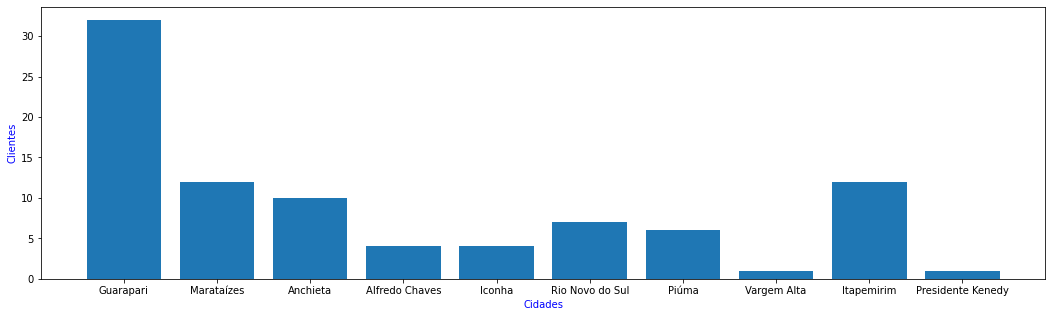

In [ ]:
clientes_base = ['Guarapari', 'Marataízes', 'Anchieta', 'Alfredo Chaves', 'Iconha', 'Rio Novo do Sul', 'Piúma', 'Vargem Alta', 'Itapemirim', 'Presidente Kenedy']
quantidade_base = [32, 12, 10, 4, 4, 7, 6, 1, 12, 1]

plt.figure(figsize=(18,5))
plt.ylabel('Clientes', color = 'blue')
plt.xlabel('Cidades', color = 'blue')
plt.bar(clientes_base, quantidade_base)


Neste gráfico, conseguimos reparar a participação massiva do setor de Guarapari no litoral relacionado a PDV.

## Clientes por cidade

###Mapa região litoral

In [ ]:
mapa_guarapari = folium.Map(location = [-20.6536700, -40.5020400 ])
mapa_guarapari

### GUARAPARI

In [ ]:
select = tabela_clientes.cidade == 'GUARAPARI'
tabela_clientes[select]

,CNPJ,razao_social,endereco,nº,bairro,cidade
cod,,,,,,
52108,9426823000158,DROGARIA SILVA NETO LTDA - ME,AVE CENTRAL,249,ADALBERTO SIMAO NADER,GUARAPARI
29564,8030635000143,DROGARIA SCHUWENCK LTDA ME/MEE,AVENIDA JOSE PADRE DE ANCHIETA LJ 02,1205,AEROPORTO,GUARAPARI
121851,22385713000153,FARMACIA PRECO BAIXO DE GUARAPARI LTDA,R DOUTOR ROBERTO CALMON,194,CENTRO,GUARAPARI
143071,42214937000100,RD BRASIL MEDICAMENTOS LTDA,R PEDRO CAETANO,111,CENTRO,GUARAPARI
4936,2093355000106,SIMOES E RODRIGUES LTDA-MEE,AV.ROBERTO CALMON - LJ 04,20,CENTRO,GUARAPARI
96946,15222023000118,DROGARIA RIBEIRO E CARVALHO LTDA ME,R AMAZONAS,16,GUARAPARI,GUARAPARI
98256,39323654000515,DROGARIA VIDA SAUDAVEL LTDA - ME FL 1,R JOAQUIM DA SILVA LIMA,189,GUARAPARI,GUARAPARI
96997,39323654000604,DROGARIA VIDA SAUDAVEL LTDA-ME,AV EWERSON DE ABREU SODRE,800,GUARAPARI,GUARAPARI
4952,921030000130,BRAMBATI E PINHEIRO LTDA-ME,AV ANCHIETA,18,IPIRANGA,GUARAPARI


### ANCHIETA

In [ ]:
select = tabela_clientes.cidade == 'ANCHIETA'
tabela_clientes[select]

,CNPJ,razao_social,endereco,nº,bairro,cidade
cod,,,,,,
124584,26620578000134,KAROLINE MARQUES COUTO - ME,R CARLOS RUBENS FLORES,166,ALVORADA,ANCHIETA
13099,30733067000104,DROGARIA BENEVENTE LTDA,AV. CARLOS LINDEMBERG,10,CENTRO,ANCHIETA
124419,21007462000100,DROGARIA CKL LTDA - ME,AV CARLOS LINDEMBERG,223,CENTRO,ANCHIETA
124540,26244233000123,DROGARIA R. FRIGERIO LTDA,R DUQUE DE CAXIAS,318,CENTRO,ANCHIETA
107735,18472270000160,FARMACIA DO TRABALHADOR DE ANCHIETA LTDA - ME,R CORONEL VITORINO,92,CENTRO,ANCHIETA
138695,36519187000181,LITORAL COMERCIO DE MEDICAMENTOS LTDA,R DUQUE DE CAXIAS,705,CENTRO,ANCHIETA
139128,38441722000154,DROGARIA SULFARMES LTDA,AV ZULMIRA ROSA ANTUNES,1669,DA JUSTICA,ANCHIETA
89575,12540470000127,FARMACIA BELLA DONNA LTDA,R COMANDANTE BRAGA JUNIOR,SN,IRIRI,ANCHIETA
117005,20516950000180,SOUZA & PERES LTDA.,R ASDRUBAL SOARES,806,JUSTICA,ANCHIETA


### ICONHA

In [ ]:
select = tabela_clientes.cidade == 'ICONHA'
tabela_clientes[select]

,CNPJ,razao_social,endereco,nº,bairro,cidade
cod,,,,,,
35840,31764509000134,DROGARIA DO ARILDO LTDA - ME,AVE CORONEL ANTONIO DUARTE,360,CENTRO,ICONHA
32786,8298854000108,DROGARIA SOARES KANISKI LTDA,R MUNIZ FREIRE,326,CENTRO,ICONHA
109568,19284185000131,FARMACIA DO TRABALHADOR DE ICONHA LTDA - ME,AV CEL ANTONIO DUARTE,230,CENTRO,ICONHA
22454,7515383000180,DROGARIA LOURENCINI LTDA ME - MEE,AV. CEL. ANTONIO DUARTE LJ A,121,ICONHA,ICONHA


### ALFREDO CHAVES

In [ ]:
select = tabela_clientes.cidade == 'ALFREDO CHAVES'
tabela_clientes[select]

,CNPJ,razao_social,endereco,nº,bairro,cidade
cod,,,,,,
17060,3613191000155,DROGARIA JOFARMA LTDA- ME/MEE,AV. GETULIO VARGAS,797,ALFREDO CHAVES,ALFREDO CHAVES
15555,5637428000163,DROGARIA BIOFARMA R & G LTDA,R THOMAZ COELHO,45,CENTRO,ALFREDO CHAVES
114480,20425834000156,FARMACIA DO TRABALHADOR DE ALFREDO CHAVES LTDA,AV GETULIO VARGAS,644,CENTRO,ALFREDO CHAVES
142873,42314938000126,PACHECOS FARMA LTDA,AV GETULIO VARGAS,686,CENTRO,ALFREDO CHAVES


### PIÚMA

In [ ]:
select = tabela_clientes.cidade == 'PIÚMA'
tabela_clientes[select]

,CNPJ,razao_social,endereco,nº,bairro,cidade
cod,,,,,,
142668,28812229000220,DROGADANI LTDA,R JAIR CARDOSO NOVAES,353,CENTRO,PIÚMA
124566,26587374000149,DROGARIA TM ANDRADE LTDA - ME,AV IZAIAS SCHERRER,12,CENTRO,PIÚMA
210255,38597843000190,MAISFARMA LTDA,AV IZAIAS SCHERRER,74 B,CENTRO,PIÚMA
106968,18494315000106,COMERCIAL JOZELIA LTDA - ME,AV ISAIAS SCHERRER,26,CENTRO,PIÚMA
98116,39323654000353,DROGARIA VIDA SAUDAVEL LTDA - ME,R IZAIAS SCHERRER,52,CENTRO,PIÚMA
106755,18393269000140,FARMACIA DO TRABALHADOR DE PIUMA LTDA - ME,AV. MARIA GONÇALVES MARVILLA,99,CENTRO,PIÚMA


### MARATAÍZES

In [ ]:
select = tabela_clientes.cidade == 'MARATAÍZES'
tabela_clientes[select]

,CNPJ,razao_social,endereco,nº,bairro,cidade
cod,,,,,,
125825,31700349000160,DROGARIA GABRIEL LTDA.,AVENIDA SIMAO SOARES,1159,AREIAS NEGRAS,MARATAÍZES
124947,28258177000101,COSME AGUIAR SOUSA EIRELI - EIRELI,AVENIDA SIMAO SOARES,900,BARRA DO ITAPEMIRIM,MARATAÍZES
11878,31821010000111,M R FARMA EIRELI,AV SIMAO SOARES,780,BARRA DO ITAPEMIRIM,MARATAÍZES
210130,85400281000203,DROGARIA ESTACAO DA SERRA LTDA,R RUBENS RANGEL,586,CENTRO,MARATAÍZES
114251,20339039000145,FPB MARATAIZES 2 COMERCIO DE MEDICAMENTOS LTDA,AV RUBENS RANGEL,586,CENTRO,MARATAÍZES
125416,85400281000122,DROGARIA ESTACAO DA SERRA LTDA,AV RUBENS RANGEL,1465,CIDADE NOVA,MARATAÍZES
97160,15006045000140,DROGARIA PRIMEIRO PASSO LTDA,AV RUBENS RANGEL,1122,SANTA RITA I,MARATAÍZES
125698,31473040000184,DROGARIA SAUDE F. V. LTDA,AV RUBENS RANGEL,1776,SANTA RITA I,MARATAÍZES
89486,13312678000151,MARTINS E COELHO LTDA - ME,AV SIMAO SOARES,SN,AREIAS NEGRAS,MARATAÍZES


### RIO NOVO DO SUL

In [ ]:
select = tabela_clientes.cidade == 'RIO NOVO DO SUL'
tabela_clientes[select]

,CNPJ,razao_social,endereco,nº,bairro,cidade
cod,,,,,,
91707,28490654000160,DROGARIA E PERFUMARIA CENTRAL LTDA - ME,R CEL. FRANCISCO ATHAYDE,106 A,CENTRO,RIO NOVO DO SUL
30287,36421915000118,DROGARIA E PERFUMARIA NOVAFAR LTDA ME/MEE,RUA CEL FRANCISCO LAVES ATHAYDE LJ A,104,CENTRO,RIO NOVO DO SUL
32905,30975411000163,DROGARIA E PERFUMARIA REALLY LTDA MEE,"RUA MUNIZ FREIRE,",S/N,CENTRO,RIO NOVO DO SUL
140107,39886979000182,DROGARIA MARCON LTDA,R CAPITAO BLEY,3,CENTRO,RIO NOVO DO SUL
138684,35856388000101,M & L DROGARIA E PERFUMARIA LTDA,R CEL. FRANCISCO ALVES ATHAYDE,109,CENTRO,RIO NOVO DO SUL
16543,39816830000127,DROGARIA E PERFUMARIA RIO NOVO LTDA,"RUA MAJOR CAETANO,",16,RIO NOVO DO SUL,RIO NOVO DO SUL
115908,20321160000140,VP PHARMASUL DROGARIA E PERFUMARIA LTDA - ME,R MAJOR CAETANO,58,RIO NOVO DO SUL,RIO NOVO DO SUL


### VARGEM ALTA

In [ ]:
select = tabela_clientes.cidade == 'VARGEM ALTA'
tabela_clientes[select]

,CNPJ,razao_social,endereco,nº,bairro,cidade
cod,,,,,,
210058,36896853000109,V J DEBONA LTDA,AVENIDA JULIO GUIDI,SN,SAO JOSE DE FRUTEIRAS,VARGEM ALTA


### ITAPEMIRIM

In [ ]:
select = tabela_clientes.cidade == 'ITAPEMIRIM'
tabela_clientes[select]

,CNPJ,razao_social,endereco,nº,bairro,cidade
cod,,,,,,
124937,19526317000194,DROGARIA ITAPEMIRIM EIRELI,AV CRISTIANO DIAS LOPES,66,CENTRO,ITAPEMIRIM
115533,20799452000192,FARMACIA PRECO BAIXO DE ITAPEMIRIM LTDA,AV AV. CRISTIANO DIAS LOPES FILHO,115,CENTRO,ITAPEMIRIM
31887,7041714000197,DROGARIA ITAIFARMA LTDA ME MEE,"AVENIDA ITAPEMIRIM ,",587,ITAIPAVA,ITAPEMIRIM
21342,7408253000148,DROGARIA NASCIMENTO LTDA -ME,AV ITAPEMIRIM,S/N,ITAIPAVA,ITAPEMIRIM
109924,19422390000116,FARMACIA DO TRABALHADOR DE ITAPEMIRIM LTDA - ME,AV ITAPEMIRIM,607,ITAIPAVA,ITAPEMIRIM
610060,41643583000156,LIMAFARMA MEDICAMENTOS LTDA,AV ITAPEMIRIM,16,ITAIPAVA,ITAPEMIRIM
210162,40086145000171,R & G DROGARIA LTDA,AV ITAPEMIRIM,639,ITAIPAVA,ITAPEMIRIM
12700,5840872000181,DROGARIA EL SHADAY LTDA - MEE,"AV. MARATAIZES ,",S/N,ITAOCA,ITAPEMIRIM
124468,23855998000101,FARMACIA RIVIERA ITAOCA LTDA - ME,AV ITAPEMIRIM,2709,ITAOCA,ITAPEMIRIM


### PRESIDENTE KENNEDY

In [ ]:
select = tabela_clientes.cidade == 'PRESIDENTE KENNEDY'
tabela_clientes[select]

,CNPJ,razao_social,endereco,nº,bairro,cidade
cod,,,,,,
33405,7144092000122,DROGARIA KENNEDY L R LTDA ME MEE,RUA ATILA VIVACQUA VIEIRA,3,CENTRO,PRESIDENTE KENNEDY


In [ ]:
dias_da_semana = ['segunda', 'terça', 'quarta', 'quinta', 'sexta']
ds = {'Cidades': ['Marataízes/Itapemirim', 'Anchieta/Piúma', 'Iconha/Rio Novo do Sul', 'Guarapari', 'Guarapari'],
      'Atendimento': ['segunda', 'terça', 'quarta', 'quinta', 'sexta'], 'Gasto' : [126.94, 82.08, 112.54, 22.15, 22.15]}
ds = pd.DataFrame(data = ds)
ds.set_index('Cidades', inplace=True)
ds

,Atendimento,Gasto
Cidades,,
Marataízes/Itapemirim,segunda,126.94
Anchieta/Piúma,terça,82.08
Iconha/Rio Novo do Sul,quarta,112.54
Guarapari,quinta,22.15
Guarapari,sexta,22.15


#Frequência de visitação quinzenal

In [ ]:
frequencia_quinzenal = [4, 2, 2, 1, 2 , 2, 1, 1, 1]
dias_da_semana = ['segunda', 'terça', 'quarta', 'quinta', 'sexta']
hz = {'Cidades': ['Guarapari', 'Marataízes', 'Anchieta', 'Alfredo Chaves', 'Iconha', 'Piuma', 'Rio Novo do Sul', 'Vargem Alta', 'Itapemirim', 'Presidente Kenedy'], 
      'Frequência_Quinzenal': [4, 2, 2, 1, 2 , 2, 1, 1, 1, 1]}
df = pd.DataFrame(data = hz)
df.set_index('Cidades', inplace=True)
df

,Frequência_Quinzenal
Cidades,
Guarapari,4
Marataízes,2
Anchieta,2
Alfredo Chaves,1
Iconha,2
Piuma,2
Rio Novo do Sul,1
Vargem Alta,1
Itapemirim,1


DIVIDINDO POR SEMANA

PRIMEIRA SEMANA

In [ ]:
ds = {'Cidades': ['Marataízes/Itapemirim', 'Anchieta/Piúma', 'Iconha/Rio Novo do sul', 'Guarapari', 'Guarapari'], 
      'Atendimento' : ['segunda', 'terça', 'quarta', 'quinta', 'sexta'], 'Gasto' : [126.94, 82.08, 112.54, 22.15, 22.15]}
ds = pd.DataFrame(data=ds)
ds.set_index('Cidades', inplace = True)
ds

,Atendimento,Gasto
Cidades,,
Marataízes/Itapemirim,segunda,126.94
Anchieta/Piúma,terça,82.08
Iconha/Rio Novo do sul,quarta,112.54
Guarapari,quinta,22.15
Guarapari,sexta,22.15


In [ ]:
total_1 = ds.Gasto.sum().round(2)

In [ ]:
print(f' Na primeira semana, serão gastos R$ {total_1}.')

 Na primeira semana, serão gastos R$ 365.86.


SEGUNDA SEMANA

In [ ]:
ss = {'Cidades': ['Marataízes/Presidente Kennedy', 'Anchieta/Piúma', 'Iconha/Alfredo Chaves', 'Guarapari', 'Guarapari'], 
      'Atendimento' : ['segunda', 'terça', 'quarta', 'quinta', 'sexta'], 'Gasto' : [165.15, 82.08, 92.60, 22.15, 22.15]}
ss = pd.DataFrame(data=ss)
ss.set_index('Cidades', inplace = True)
ss

,Atendimento,Gasto
Cidades,,
Marataízes/Presidente Kennedy,segunda,165.15
Anchieta/Piúma,terça,82.08
Iconha/Alfredo Chaves,quarta,92.60
Guarapari,quinta,22.15
Guarapari,sexta,22.15


In [ ]:
total_2 = ss.Gasto.sum().round(2)

In [ ]:
print(f' Na segunda semana, serão gastos R$ {total_2}.')

 Na segunda semana, serão gastos R$ 384.13.


Conforme o mês têm aproximadamente 4 semanas, teremos de gasto:

In [ ]:
tot = (total_1 * 2 ) + (total_2 *2)
tot

1499.98

In [ ]:
print(f'Por mês, o RCA que trabalhar no setor do Litoral, gastará em média R$ {tot} para estar visitando todos os clientes, desconsiderando deslocamento dentro das cidades.')

Por mês, o RCA que trabalhar no setor do Litoral, gastará em média R$ 1499.98 para estar visitando todos os clientes, desconsiderando deslocamento dentro das cidades.


Por mês, o RCA que trabalhar no setor do Litoral, gastará em média R$ 1499.98 para estar visitando todos os clientes, desconsiderando deslocamento dentro das cidades.


# Faturamento Geral

Com base na venda mensal, conseguimos obter informações necessárias para aprimorarmmos a venda no PDA.

In [ ]:
tabela_vendas = pd.read_excel('VENDASTICKETMEDIO.xlsx')
tabela_vendas

,CÓD,CNPJ,RAZÃO SOCIAL,ENDEREÇO,Nº,BAIRRO,CIDADE,PDA,VOLUME GERAL
0,13307,949687000106,ASSUNTA DESTEFANE,AV MARIA DE LOURDES CARVALHO DANTAS,S/N,PRAIA DO MORRO,GUARAPARI,NaN,891.46
1,4952,921030000130,BRAMBATI E PINHEIRO LTDA-ME,AV ANCHIETA,18,IPIRANGA,GUARAPARI,465.03,1745.02
2,6742,1161964000184,BRAMBATI E SANTOS LTDA,RUA AUGUSTO MATTOS,15,MUQUIÇABA,GUARAPARI,565.24,1402.50
3,210141,39751208000188,C A DE SOUSA,AV BEIRA MAR,1123,PRAIA DE CASTELHANOS,ANCHIETA,NaN,0.00
4,106968,18494315000106,COMERCIAL JOZELIA LTDA - ME,AV ISAIAS SCHERRER,26,CENTRO,PIÚMA,NaN,1343.75
...,...,...,...,...,...,...,...,...,...
84,4936,2093355000106,SIMOES E RODRIGUES LTDA-MEE,AV.ROBERTO CALMON - LJ 04,20,CENTRO,GUARAPARI,NaN,0.00
85,117005,20516950000180,SOUZA & PERES LTDA.,R ASDRUBAL SOARES,806,JUSTICA,ANCHIETA,93.44,588.64
86,210058,36896853000109,V J DEBONA LTDA,AVENIDA JULIO GUIDI,SN,SAO JOSE DE FRUTEIRAS,VARGEM ALTA,NaN,268.14
87,115908,20321160000140,VP PHARMASUL DROGARIA E PERFUMARIA LTDA - ME,R MAJOR CAETANO,58,RIO NOVO DO SUL,RIO NOVO DO SUL,NaN,539.11


In [ ]:
tabela_vendas.columns

Index(['CÓD', 'CNPJ', 'RAZÃO SOCIAL', 'ENDEREÇO', 'Nº', 'BAIRRO', 'CIDADE',
       'PDA', 'VOLUME GERAL'],
      dtype='object')

In [ ]:
tipos_de_dados = pd.DataFrame(tabela_vendas.dtypes, columns = ['Tipos de Dados'])
tipos_de_dados.columns.name = 'Variáveis'
tipos_de_dados

Variáveis,Tipos de Dados
CÓD,int64
CNPJ,int64
RAZÃO SOCIAL,object
ENDEREÇO,object
Nº,object
BAIRRO,object
CIDADE,object
PDA,float64
VOLUME GERAL,float64


In [ ]:
tabela_vendas['CIDADE'].value_counts()
tabela_vendas.replace({'MARATAIZES' : 'MARATAÍZES', 'PIUMA': 'PIÚMA'}, inplace=True)
tabela_vendas
tabela_vendas['CIDADE'].value_counts()

GUARAPARI             32
MARATAÍZES            12
ITAPEMIRIM            12
ANCHIETA              10
RIO NOVO DO SUL        7
PIÚMA                  6
ALFREDO CHAVES         4
ICONHA                 4
PRESIDENTE KENNEDY     1
VARGEM ALTA            1
Name: CIDADE, dtype: int64

In [ ]:
renomear_vendas = {'CÓD' : 'cod',
            'CNPJ' : 'CNPJ',
            'RAZÃO SOCIAL' : 'razao_social',
            'ENDEREÇO' : 'endereco',
            'Nº' : 'nº',
            'BAIRRO' : 'bairro',
            'CIDADE': 'cidade'} 

tabela_vendas = tabela_vendas.rename(columns = renomear_vendas)

In [ ]:
tabela_vendas

,cod,CNPJ,razao_social,endereco,nº,bairro,cidade,PDA,VOLUME GERAL
0,13307,949687000106,ASSUNTA DESTEFANE,AV MARIA DE LOURDES CARVALHO DANTAS,S/N,PRAIA DO MORRO,GUARAPARI,NaN,891.46
1,4952,921030000130,BRAMBATI E PINHEIRO LTDA-ME,AV ANCHIETA,18,IPIRANGA,GUARAPARI,465.03,1745.02
2,6742,1161964000184,BRAMBATI E SANTOS LTDA,RUA AUGUSTO MATTOS,15,MUQUIÇABA,GUARAPARI,565.24,1402.50
3,210141,39751208000188,C A DE SOUSA,AV BEIRA MAR,1123,PRAIA DE CASTELHANOS,ANCHIETA,NaN,0.00
4,106968,18494315000106,COMERCIAL JOZELIA LTDA - ME,AV ISAIAS SCHERRER,26,CENTRO,PIÚMA,NaN,1343.75
...,...,...,...,...,...,...,...,...,...
84,4936,2093355000106,SIMOES E RODRIGUES LTDA-MEE,AV.ROBERTO CALMON - LJ 04,20,CENTRO,GUARAPARI,NaN,0.00
85,117005,20516950000180,SOUZA & PERES LTDA.,R ASDRUBAL SOARES,806,JUSTICA,ANCHIETA,93.44,588.64
86,210058,36896853000109,V J DEBONA LTDA,AVENIDA JULIO GUIDI,SN,SAO JOSE DE FRUTEIRAS,VARGEM ALTA,NaN,268.14
87,115908,20321160000140,VP PHARMASUL DROGARIA E PERFUMARIA LTDA - ME,R MAJOR CAETANO,58,RIO NOVO DO SUL,RIO NOVO DO SUL,NaN,539.11


In [ ]:
tabela_vendas.set_index('cod', inplace=True)
tabela_vendas

,CNPJ,razao_social,endereco,nº,bairro,cidade,PDA,VOLUME GERAL
cod,,,,,,,,
13307,949687000106,ASSUNTA DESTEFANE,AV MARIA DE LOURDES CARVALHO DANTAS,S/N,PRAIA DO MORRO,GUARAPARI,NaN,891.46
4952,921030000130,BRAMBATI E PINHEIRO LTDA-ME,AV ANCHIETA,18,IPIRANGA,GUARAPARI,465.03,1745.02
6742,1161964000184,BRAMBATI E SANTOS LTDA,RUA AUGUSTO MATTOS,15,MUQUIÇABA,GUARAPARI,565.24,1402.50
210141,39751208000188,C A DE SOUSA,AV BEIRA MAR,1123,PRAIA DE CASTELHANOS,ANCHIETA,NaN,0.00
106968,18494315000106,COMERCIAL JOZELIA LTDA - ME,AV ISAIAS SCHERRER,26,CENTRO,PIÚMA,NaN,1343.75
...,...,...,...,...,...,...,...,...
4936,2093355000106,SIMOES E RODRIGUES LTDA-MEE,AV.ROBERTO CALMON - LJ 04,20,CENTRO,GUARAPARI,NaN,0.00
117005,20516950000180,SOUZA & PERES LTDA.,R ASDRUBAL SOARES,806,JUSTICA,ANCHIETA,93.44,588.64
210058,36896853000109,V J DEBONA LTDA,AVENIDA JULIO GUIDI,SN,SAO JOSE DE FRUTEIRAS,VARGEM ALTA,NaN,268.14


In [ ]:
selecao = tabela_vendas['cidade'] == 'GUARAPARI'
n1 = tabela_vendas[selecao].shape[0]
n1

32

In [ ]:
tabela_vendas['VOLUME GERAL'].sum().round(3)

86461.6

O valor total de pedido no mês foi de R$ 86461.60

## Faturamento Geral por cidade - função - DEF

In [ ]:
def rota_litoral(setor, dataset=tabela_vendas):
    selecao = tabela_vendas['cidade'] == setor
    n1 = tabela_vendas[selecao].shape[0]
    n2 = tabela_vendas[selecao]['volume_geral'].sum()
    print(f' A cidade de {setor} tem {n1} clientes com um faturamento de R$ {n2}')


In [ ]:
rota_litoral('GUARAPARI', tabela_vendas)

 A cidade de GUARAPARI tem 32 clientes com um faturamento de R$ 26776.38


## Faturamento Geral por cidade - Gráfico


In [ ]:
faturamento_por_cidade = tabela_vendas[['cidade', 'volume_geral']].groupby('cidade').sum().round(2)
faturamento_por_cidade

,volume_geral
cidade,
ALFREDO CHAVES,10308.60
ANCHIETA,7926.89
GUARAPARI,26776.38
ICONHA,5041.78
ITAPEMIRIM,9806.49
MARATAÍZES,17575.27
PIÚMA,5038.44
PRESIDENTE KENNEDY,0.00
RIO NOVO DO SUL,3719.61


In [ ]:
dlist = faturamento_por_cidade.to_dict()
dict_lista = {'ALFREDO CHAVES': 10308.6,
  'ANCHIETA': 7926.89,
  'GUARAPARI': 26776.38,
  'ICONHA': 5041.78,
  'ITAPEMIRIM': 9806.49,
  'MARATAÍZES': 17575.27,
  'PIÚMA': 5038.44,
  'PRESIDENTE KENNEDY': 0.0,
  'RIO NOVO DO SUL': 3719.61,
  'VARGEM ALTA': 268.14}

In [ ]:
 x = dict_lista.keys()
 y = dict_lista.values()

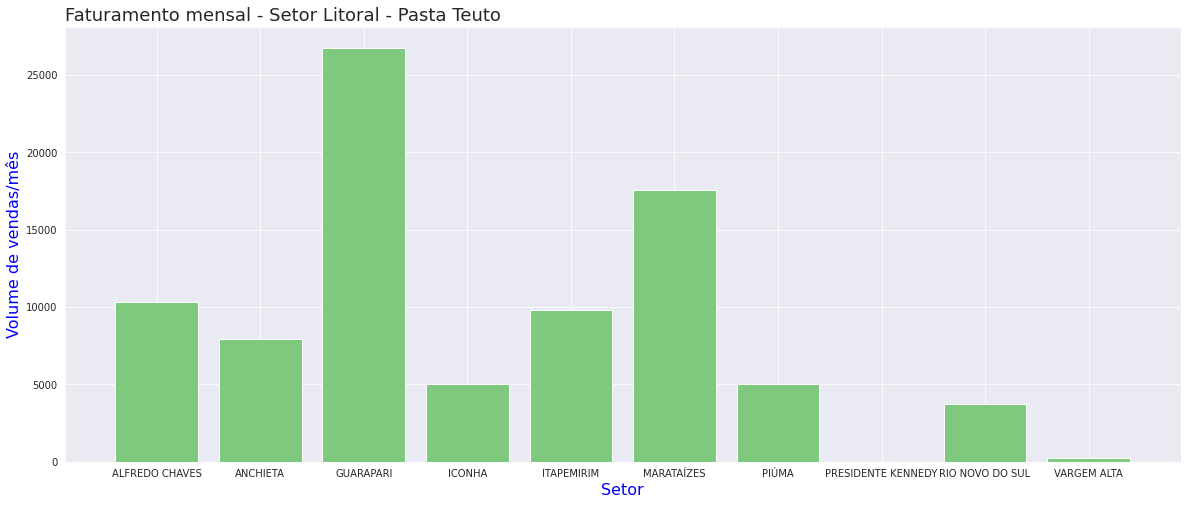

In [ ]:
#TROCAR O PLT.BAR

sns.set_palette('Accent')
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
plt.ylabel('Volume de vendas/mês', color = 'blue', fontsize=16)
plt.xlabel('Setor', color = 'blue', fontsize=16)
plt.title('Faturamento mensal - Setor Litoral - Pasta Teuto', loc='left', fontsize=18)
x = plt.bar(x, y)


# Vendas por PDA

In [ ]:
tv = tabela_vendas.dropna()
tv

,cnpj,razao_social,endereco,num,bairro,cidade,pda,volume_geral
cod,,,,,,,,
4952,921030000130,BRAMBATI E PINHEIRO LTDA-ME,AV ANCHIETA,18,IPIRANGA,GUARAPARI,465.03,1745.02
6742,1161964000184,BRAMBATI E SANTOS LTDA,RUA AUGUSTO MATTOS,15,MUQUIÇABA,GUARAPARI,565.24,1402.50
6572,30776462000166,COMERCIO E MEDICAMENTOS LANCAPI LTDA,R. SANTANA DO IAPO,29,MUQUIÇABA,GUARAPARI,368.89,649.24
124947,28258177000101,COSME AGUIAR SOUSA EIRELI - EIRELI,AVENIDA SIMAO SOARES,900,BARRA DO ITAPEMIRIM,MARATAÍZES,1233.60,1452.11
13099,30733067000104,DROGARIA BENEVENTE LTDA,AV. CARLOS LINDEMBERG,10,CENTRO,ANCHIETA,394.43,502.99
94650,14934877000164,DROGARIA CARVALHO LTDA ME,AVENIDA SALVADOR PECANHA,166,KUBITSCHEK,GUARAPARI,684.66,917.74
124757,26774114000182,DROGARIA CESCONETTO LTDA - ME,R DA CORVETA,529,SANTA MONICA,GUARAPARI,700.06,700.06
91707,28490654000160,DROGARIA E PERFUMARIA CENTRAL LTDA - ME,R CEL. FRANCISCO ATHAYDE,106 A,CENTRO,RIO NOVO DO SUL,265.51,1062.09
30287,36421915000118,DROGARIA E PERFUMARIA NOVAFAR LTDA ME/MEE,RUA CEL FRANCISCO LAVES ATHAYDE LJ A,104,CENTRO,RIO NOVO DO SUL,385.33,385.33


In [ ]:
pda_por_cidade = tv[['cidade', 'pda', 'volume_geral']].groupby('cidade').sum().round(2)
pda_por_cidade

,pda,volume_geral
cidade,,
ANCHIETA,1447.06,2558.81
GUARAPARI,8748.72,19938.78
ICONHA,2533.64,2592.07
MARATAÍZES,3077.90,9331.40
PIÚMA,191.34,2012.72
RIO NOVO DO SUL,1238.40,2391.76


In [ ]:
dict_pda = pda_por_cidade.to_dict()
dict_pda = { 'ALFREDO CHAVES':0,
'ANCHIETA': 1447.06,
'GUARAPARI': 8748.72,
'ICONHA': 2533.64,
'ITAPEMERIM': 0,
'MARATAÍZES': 3077.9,
'PIÚMA': 191.34,
'PRESIDENTE KENNEDY': 0,
'RIO NOVO DO SUL': 1238.4,
'VARGEM ALTA':0}

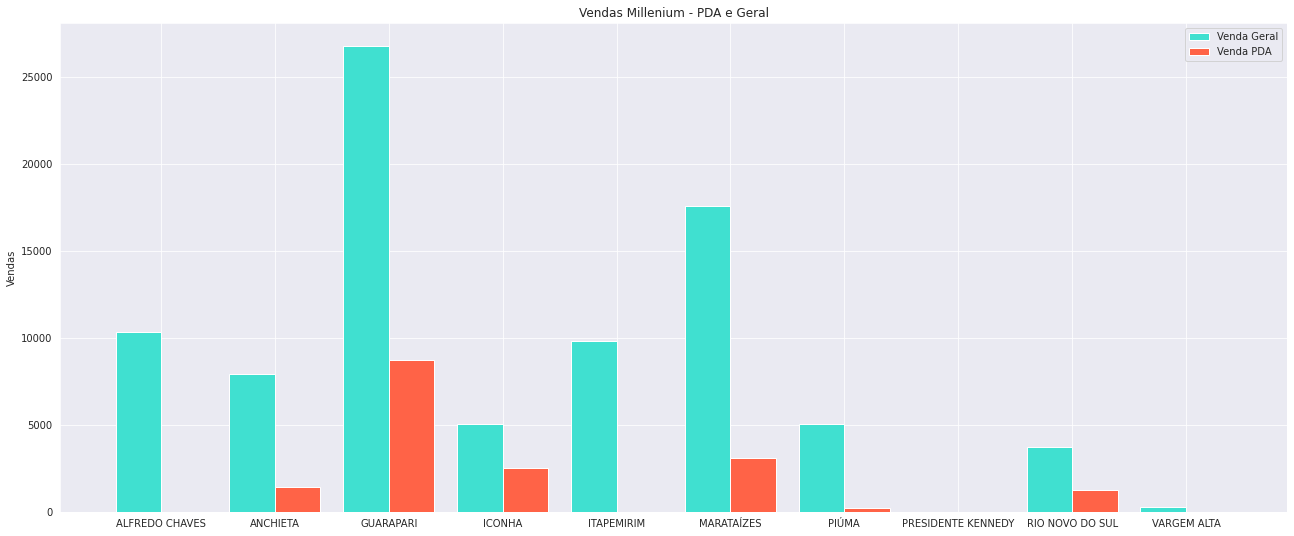

In [ ]:
rota = ['ALFREDO CHAVES', 'ANCHIETA', 'GUARAPARI', 'ICONHA', 'ITAPEMIRIM', 'MARATAÍZES', 'PIÚMA', 'PRESIDENTE KENNEDY', 'RIO NOVO DO SUL','VARGEM ALTA']
venda_geral = dict_lista.values()
venda_pda = dict_pda.values()
x = np.arange(len(rota))
largura = 0.40
fig,ax = plt.subplots(figsize = (22,9))

grupo1 = ax.bar(x - largura/2, venda_geral, largura, label = 'Venda Geral', color = 'turquoise')
grupo2 = ax.bar(x + largura/2, venda_pda, largura, label = 'Venda PDA', color = 'tomato')
ax.set_title('Vendas Millenium - PDA e Geral')
ax.set_ylabel('Rota')
ax.set_ylabel('Vendas')
ax.set_xticks(x)
ax.set_xticklabels(rota)
ax.legend()            
plt.show()

No gráfico acima, temos uma resposta relacionada ao nosso estudo. Percebemos que nos setores distantes, o PDA não tem se efetivado.


#CONCLUSÃO


Considerando que o foco da empresa se envolve na melhoria do PDA, de acordo com o estudo de custo/mês, o RCA gastaria em torno de R$1499.98 para visitar todas as cidades da rota. 

Para um melhor trabalho no PDA, a otimização do tempo, melhoria na logística e redução de custo mensal é de suma importância. Desta forma, sugiro um estudo para reduzir o setor e aumentar o volume da pasta. Este setor de viagem não nos permite visitarmos com excelência todos os nossos clientes da base, afetando diretamente a necessidade da empresa com o foco no PDA.